In [ ]:
### Run this cell to import the packages you will need to unpack the dataset
# File manipulation and IO (input/output)
import os
import pickle
import zipfile

# Import numerical and dataframe handling
import numpy as np
import scipy
import pandas as pd

# Data preprocessing
from PIL import Image
from sklearn.utils import shuffle

# Model scoring
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Import standard machine learning machinery
import tensorflow as tf

# Garbage collection (for saving RAM during training)
import gc

# Import plotting functionality
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
import matplotlib
import keras
from keras.layers import Dense, InputLayer, Dropout, Conv1D
from keras import train_test_split

ImportError: cannot import name 'train_test_split' from 'keras' (/usr/local/lib/python3.10/dist-packages/keras/__init__.py)

In [ ]:
# should be 26472
path = "../isicdataset/ISIC-images/"

In [ ]:
df_main = pd.read_csv(path + 'metadata.csv')
df_main

,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,...,mel_class,mel_mitotic_index,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,sex
0,ISIC_0000000,Anonymous,CC-0,NaN,55,anterior torso,benign,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
1,ISIC_0000001,Anonymous,CC-0,NaN,30,anterior torso,benign,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
2,ISIC_0000002,Anonymous,CC-0,NaN,60,upper extremity,malignant,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
3,ISIC_0000003,Anonymous,CC-0,NaN,30,upper extremity,benign,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male
4,ISIC_0000004,Anonymous,CC-0,NaN,80,posterior torso,malignant,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,ISIC_9991967,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,366.0,70,lower extremity,benign,NaN,False,contact polarized,...,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2507276,NaN,male
26470,ISIC_9995691,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,NaN,50,upper extremity,benign,NaN,False,contact polarized,...,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2358028,NaN,male
26471,ISIC_9997614,Memorial Sloan Kettering Cancer Center,CC-BY-NC,407.0,50,upper extremity,benign,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_1705144,NaN,female
26472,ISIC_9998682,Sydney Melanoma Diagnostic Center at Royal Pri...,CC-BY-NC,NaN,60,head/neck,malignant,NaN,True,NaN,...,melanoma in situ,NaN,NaN,NaN,NaN,True,NaN,IP_2516168,NaN,male


In [ ]:
df = df_main[["age_approx", "sex", "anatom_site_general", "diagnosis"]]
df.head()

,age_approx,sex,anatom_site_general,diagnosis
0,55,female,anterior torso,nevus
1,30,female,anterior torso,nevus
2,60,female,upper extremity,melanoma
3,30,male,upper extremity,nevus
4,80,male,posterior torso,melanoma


In [ ]:
df = pd.get_dummies(df, dtype=int)

In [ ]:
columns = ['diagnosis_actinic keratosis',
       'diagnosis_basal cell carcinoma', 'diagnosis_melanoma',
       'diagnosis_nevus', 'diagnosis_seborrheic keratosis',
       'diagnosis_solar lentigo', 'diagnosis_squamous cell carcinoma']
df["diagnosis"] = df[columns].values.tolist()
df.drop(columns, axis=1, inplace=True)
df.head()

,age_approx,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_upper extremity,diagnosis
0,55,1,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0]"
1,30,1,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0]"
2,60,1,0,0,0,0,0,0,0,0,1,"[0, 0, 1, 0, 0, 0, 0]"
3,30,0,1,0,0,0,0,0,0,0,1,"[0, 0, 0, 1, 0, 0, 0]"
4,80,0,1,0,0,0,0,0,0,1,0,"[0, 0, 1, 0, 0, 0, 0]"


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("diagnosis", axis=1), df["diagnosis"], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

model_txt = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(19, activation="relu"),
    Dense(7, activation="relu"),
])

model_txt.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.005), loss = "categorical_crossentropy", metrics=["accuracy"])
model_txt.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                228       
                                                                 
 dense_7 (Dense)             (None, 7)                 140       
                                                                 
Total params: 368
Trainable params: 368
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Convert the diagnosis column to a numpy array to resolve the issue
y_train = np.array(y_train.tolist())
y_val = np.array(y_val.tolist())
y_test = np.array(y_test.tolist())

# Train the model again
epochs = 5
batch_size = 100
history = model_txt.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
170/170 [==============================] - 1s 2ms/step - loss: 2.8536 - accuracy: 0.5827 - val_loss: 2.2559 - val_accuracy: 0.6530
Epoch 2/5
170/170 [==============================] - 0s 1ms/step - loss: 2.2300 - accuracy: 0.6476 - val_loss: 2.2542 - val_accuracy: 0.6530
Epoch 3/5
170/170 [==============================] - 0s 1ms/step - loss: 2.2577 - accuracy: 0.6325 - val_loss: 2.2807 - val_accuracy: 0.6530
Epoch 4/5
170/170 [==============================] - 0s 1ms/step - loss: 2.2217 - accuracy: 0.6476 - val_loss: 2.2495 - val_accuracy: 0.6530
Epoch 5/5
170/170 [==============================] - 0s 1ms/step - loss: 2.2218 - accuracy: 0.6489 - val_loss: 2.2464 - val_accuracy: 0.6530


Text(0, 0.5, 'Error')

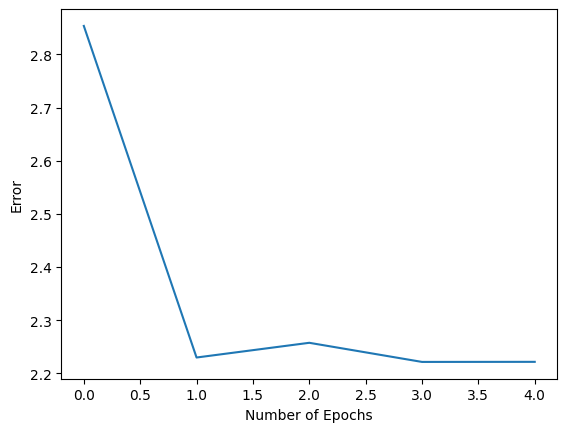

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("Number of Epochs")
plt.ylabel("Error")

In [ ]:
model_txt.evaluate(X_test, y_test)

166/166 [==============================] - 0s 596us/step - loss: 2.3717 - accuracy: 0.6346


[2.3717293739318848, 0.6345608830451965]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d80955c4-ad7b-4eff-b971-b372a13f61b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>